In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [3]:
hdu1 = fits.open('arcs.fits')
data = hdu1[0].data

spec = np.nanmedian(data,axis=1)

In [4]:
import pandas as pd
df = pd.DataFrame({'counts':spec})
df

,counts
0,5.858733
1,4.407872
2,4.326311
3,4.300486
4,4.611293
...,...
2395,3.048952
2396,3.929400
2397,3.161592
2398,3.926924


In [5]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(spec, height=100)
pk = df.iloc[peaks]

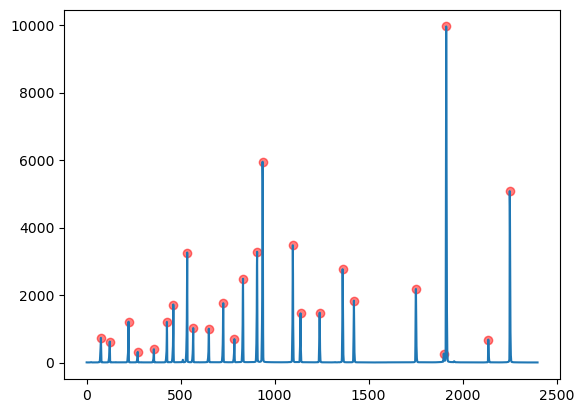

In [6]:
plt.plot(spec)
plt.scatter(peaks,pk.values,c='red',alpha=0.5)

In [7]:
peaks

array([  76,  123,  223,  272,  358,  427,  461,  535,  567,  650,  727,
        786,  832,  907,  936, 1097, 1138, 1240, 1362, 1422, 1752, 1900,
       1913, 2137, 2251])

In [8]:
lambda_peaks = [(6717.04,1422),(6678.2,1362),(6598.95,1240),
                (6532.88,1138),(6506.53,1097),
               (6382.99,832),(6334.40,786),(6304.79,727),(6266.50,650),
               (6217.28,567),(6163.59,535),(6143.60,461),(6096.16,427)]

In [9]:
x_vals = [lambda_peaks[i][1] for i in range(len(lambda_peaks))]
y_vals = [lambda_peaks[i][0] for i in range(len(lambda_peaks))]
print(x_vals)

[1422, 1362, 1240, 1138, 1097, 832, 786, 727, 650, 567, 535, 461, 427]


In [10]:
params = np.polyfit(x_vals,y_vals,deg=1)

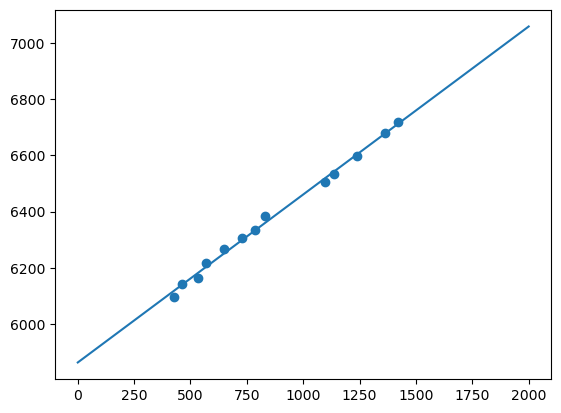

In [11]:
x = np.linspace(0,2000)
y = params[0]*x+params[1]
plt.plot(x,y)
plt.scatter(x_vals,y_vals)

Filename: UGC.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     213   (250, 2400)   float64   


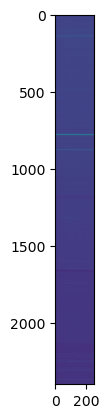

In [12]:
hdu2 = fits.open('UGC.fits')
hdu2.info()
plt.imshow(hdu2[0].data,cmap='viridis')

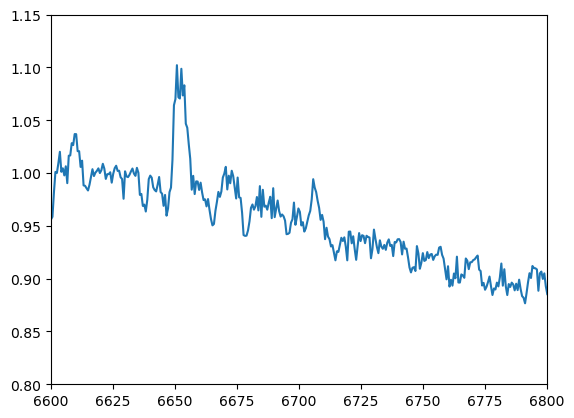

In [13]:
data = hdu2[0].data[:,30:150]
counts = np.nanmedian(data,axis=1)
counts.shape

x = np.arange(0,counts.shape[0])
ind = params[0]*x+params[1]

plt.plot(ind,counts)
plt.xlim(6600,6800)
plt.ylim(0.8,1.15)
plt.savefig('UGC.png')

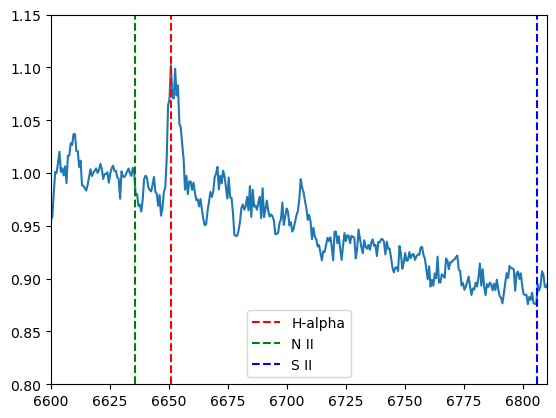

In [14]:
z = 0.0134

# Rest wavelengths (in Angstroms)
lambda_H_alpha_rest = 6562.8
lambda_N_II_rest = 6548
lambda_S_II_rest = 6716

# Calculate the redshifted wavelengths
lambda_H_alpha_observed = lambda_H_alpha_rest * (1 + z)
lambda_N_II_observed = lambda_N_II_rest * (1 + z)
lambda_S_II_observed = lambda_S_II_rest * (1 + z)

# Plot the spectral data
plt.plot(ind, counts)
plt.xlim(6600, 6810)
plt.ylim(0.8, 1.15)

# Add vertical lines for each of the redshifted spectral lines
plt.axvline(x=lambda_H_alpha_observed, color='r', linestyle='--', label='H-alpha')
plt.axvline(x=lambda_N_II_observed, color='g', linestyle='--', label='N II')
plt.axvline(x=lambda_S_II_observed, color='b', linestyle='--', label='S II')

# Adding a legend to distinguish the lines
plt.legend()

plt.savefig('UGC.png',dpi=300)

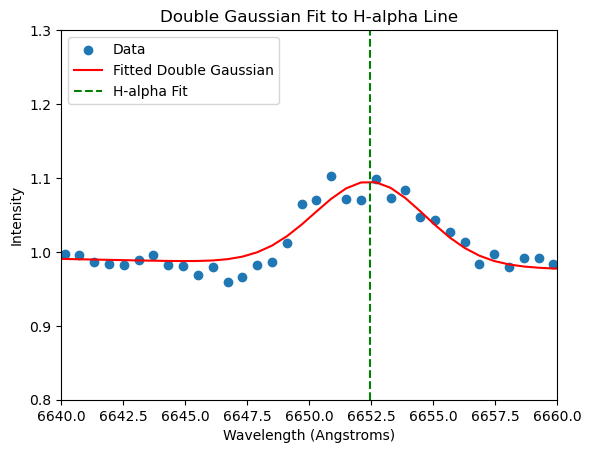

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a double Gaussian function
def double_gaussian(x, amp1, mean1, stddev1, amp2, mean2, stddev2):
    g1 = amp1 * np.exp(-((x - mean1) ** 2) / (2 * stddev1 ** 2))
    g2 = amp2 * np.exp(-((x - mean2) ** 2) / (2 * stddev2 ** 2))
    return g1 + g2


# Initial guesses:
amp1_guess = 1.1  # peak of the left Gaussian
mean1_guess = 6651 # central wavelength of the left peak
stddev1_guess = 1.0  # width of the left Gaussian

amp2_guess = 1.09  # peak of the right Gaussian
mean2_guess = 6652  # central wavelength of the right peak
stddev2_guess = 1.0  # width of the right Gaussian

# Bundle initial guesses:
p0 = [amp1_guess, mean1_guess, stddev1_guess, amp2_guess, mean2_guess, stddev2_guess]

# Fit the double Gaussian to the data
popt, pcov = curve_fit(double_gaussian, ind, counts, p0=p0)

# Plotting the original data
plt.scatter(ind, counts, label='Data')

# Plotting the fitted double Gaussian
fitted_data = double_gaussian(ind, *popt)
plt.plot(ind, fitted_data, label='Fitted Double Gaussian', color='red')

# Labels, title and legend
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Intensity')
plt.xlim(6640, 6660)
plt.ylim(0.8,1.3)

#Plot the mean of the two Gaussians
plt.axvline(x=popt[1], color='green', linestyle='--', label='H-alpha Fit')


plt.title('Double Gaussian Fit to H-alpha Line')
plt.legend()

# Save and show
plt.savefig('H_alpha_double_fit.png')
plt.show()


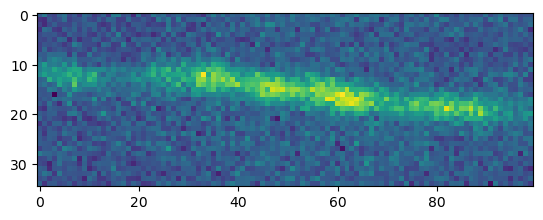

In [85]:
#Making velocity Space plot
my_line = hdu2[0].data[1305:1340,40:140]
plt.imshow(my_line,cmap='viridis')


In [95]:
vel = []
for i in range(my_line.shape[1]):
    column_data = my_line[:, i]
    x_data = np.arange(len(column_data))

    df = pd.DataFrame({'x':x_data,'vel':column_data})
    vel.append(df['vel'].idxmax())
    x = df['vel'].idxmax()
    # plt.plot(column_data)
    # plt.scatter(x,df['vel'].max())
    # plt.show()
wv = 1305 + np.array(vel)
wavelength = params[0]*wv+params[1]
print(wavelength)



[6650.28455539 6650.28455539 6650.88193317 6649.68717761 6651.47931095
 6650.28455539 6650.28455539 6651.47931095 6650.28455539 6651.47931095
 6650.88193317 6650.28455539 6649.68717761 6655.06357764 6650.28455539
 6649.68717761 6645.50553314 6649.68717761 6650.88193317 6650.28455539
 6650.88193317 6650.28455539 6650.28455539 6650.28455539 6650.88193317
 6650.28455539 6649.68717761 6650.28455539 6651.47931095 6650.88193317
 6650.88193317 6650.28455539 6650.88193317 6650.28455539 6649.68717761
 6650.28455539 6650.88193317 6650.88193317 6651.47931095 6650.88193317
 6651.47931095 6651.47931095 6652.07668873 6651.47931095 6650.28455539
 6651.47931095 6651.47931095 6652.07668873 6652.07668873 6652.07668873
 6652.07668873 6652.07668873 6652.07668873 6652.07668873 6652.07668873
 6652.07668873 6652.67406651 6652.07668873 6653.27144429 6653.27144429
 6652.67406651 6652.67406651 6653.27144429 6653.86882208 6653.27144429
 6653.27144429 6652.67406651 6653.86882208 6654.46619986 6653.86882208
 6653.

In [ ]:
# Print the peaks


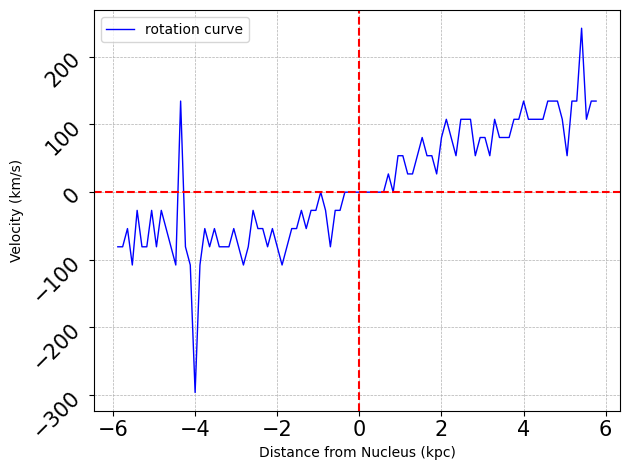

In [106]:
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM

#Cosmo things
z = 0.0134
H0 = 70* (u.km / (u.s * u.Mpc))
cosmo = FlatLambdaCDM(H0=H0, Om0= 0.3)

scale_kpc_arcsec = cosmo.arcsec_per_kpc_proper(z).value

def get_vel(l_obs,l_ref=6652):
    c = 299792.458
    l_center = 6652.07668873
    del_lambda = l_obs-l_center
    v = c*(del_lambda/l_ref)
    return v

vel = get_vel(wavelength)
x = np.arange(0,len(vel))

x_cen = 50
pixel_scale = 0.43
darc = (x-x_cen) * pixel_scale

# Arcseconds to kpc
x_dis = darc/scale_kpc_arcsec

plt.plot(x_dis, vel,color='blue', linewidth=1,label='rotation curve')  # Dashed line, blue color, circle markers

# Horizontal and vertical lines with a slightly thicker line
plt.axhline(0, color='red', linewidth=1.5,linestyle='--')
plt.axvline(0, color='red',linestyle='--', linewidth=1.5)

plt.xlabel('Distance from Nucleus (kpc)')
plt.ylabel('Velocity (km/s)')

# Adding a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customizing the ticks for better readability
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=45)

plt.legend()


# Use a tight layout to ensure everything fits without overlapping
plt.tight_layout()

plt.show()
